<a href="https://colab.research.google.com/github/bdev-io/SOYBEAN/blob/main/SOY_BEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
BASE_PATH = "/content/drive/MyDrive/crop"
CSV_FILE = "/content/drive/MyDrive/crop/data.csv"

Mounted at /content/drive


In [ ]:
!pip install colab_ssh --upgrade

from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared
launch_ssh_cloudflared(password="snipershell!")

In [ ]:
# import kagglehub
# utathya_future_volume_prediction_path = kagglehub.dataset_download('utathya/future-volume-prediction')

# print('Data source import complete.')


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 531k/531k [00:00<00:00, 99.3MB/s]

Extracting files...
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install pytorch_forecasting

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 197.7/197.7 kB 22.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 818.9/818.9 kB 52.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 69.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 37.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
import copy
from pathlib import Path
import warnings

import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
import numpy as np
import pandas as pd
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

In [ ]:
data = pd.read_csv(CSV_FILE)
data = data.drop(columns=['Unnamed: 0'])
data_origin = data.copy()
data.head()
# data.size

print (data['state'].drop_duplicates())
print (data['crop'].drop_duplicates())

0      North Dakota
42     South Dakota
84         Nebraska
126          Kansas
168        Missouri
210        Arkansas
252     Mississippi
294            Ohio
336         Indiana
378        Illinois
420            Iowa
462       Wisconsin
504       Minnesota
Name: state, dtype: object
0     soybeans
21        corn
Name: crop, dtype: object


In [ ]:
#from pytorch_forecasting.data.examples import get_stallion_data

#data = get_stallion_data()


#data_origin = data.copy()

In [ ]:
#data = pd.read_parquet("/kaggle/input/stallion/stallion.parquet")


df = data_origin
df["time_idx"] = df["year"] - df["year"].min()
df["group"] = df["state"] + "_" + df["crop"]


data = df.copy()

print (data.shape)

(546, 88)


In [ ]:
df

target         state  year      crop     area    ndvi_1   ndvi_17  \
0      33.5  North Dakota  2001  soybeans  2150000  -122.538  -214.272   
1      33.0  North Dakota  2002  soybeans  2670000  1403.378   403.376   
2      29.0  North Dakota  2003  soybeans  3150000   460.362   124.444   
3      23.0  North Dakota  2004  soybeans  3750000  -126.944   -96.872   
4      36.5  North Dakota  2005  soybeans  2950000   -54.288   532.700   
..      ...           ...   ...       ...      ...       ...       ...   
541    47.5     Minnesota  2017  soybeans  8150000   567.558   615.720   
542    49.0     Minnesota  2018  soybeans  7750000   955.072  1005.745   
543    44.0     Minnesota  2019  soybeans  6850000   951.611   606.862   
544    50.0     Minnesota  2020  soybeans  7450000   438.422   331.998   
545    47.0     Minnesota  2021  soybeans  7650000   779.010   615.500   

      ndvi_33   ndvi_49   ndvi_65  ...   temp_305   temp_313   temp_321  \
0    -213.254  -217.498   682.852  ...  14261.334  14322.296  14163.436   
1    1442.808  1988.787  1132.954  ...  13908.839  13802.472  13913.661   
2      89.070   223.286  1495.452  ...  13190.139  13560.216  13665.805   
3    -269.606  -283.778   211.704  ...  14074.946  14033.510  13960.308   
4    1071.120  1161.004  1436.910  ...  14147.837  14211.745  13901.456   
..        ...       ...       ...  ...        ...        ...        ...   
541  1288.109  1831.220  2500.335  ...  13584.654  13606.306  13670.277   
542   797.453   373.599   448.504  ...  14009.420  13638.532  13328.109   
543   317.693   333.812   187.465  ...  13580.098  13478.269  13656.959   
544   280.665   251.008  1080.465  ...  14254.699  14520.200  13703.022   
545   593.772   934.148  2567.576  ...  14106.516  14076.823  13704.650   

      temp_329   temp_337   temp_345   temp_353   temp_361  time_idx  \
0    13642.882  13538.665  13432.687  13243.590  12922.187         0   
1    13770.797  13628.559  13847.344  13017.994  13301.362         1   
2    13437.337  13376.106  13091.654  13509.886  12872.187         2   
3    13611.019  13583.629  13662.843  13491.902  13331.316         3   
4    13448.038  12962.760  13565.456  13340.081  13725.257         4   
..         ...        ...        ...        ...        ...       ...   
541  13805.654  13509.400  13310.792  13105.405  12480.281        16   
542  13364.327  13352.076  13617.792  13360.545  12798.123        17   
543  13257.648  13414.089  12887.880  13337.381  13167.397        18   
544  13692.064  13796.279  13623.221  13273.848  13082.104        19   
545  13620.299  13360.638  13515.864  13338.281  12909.862        20   

                     group  
0    North Dakota_soybeans  
1    North Dakota_soybeans  
2    North Dakota_soybeans  
3    North Dakota_soybeans  
4    North Dakota_soybeans  
..                     ...  
541     Minnesota_soybeans  
542     Minnesota_soybeans  
543     Minnesota_soybeans  
544     Minnesota_soybeans  
545     Minnesota_soybeans  

[546 rows x 88 columns]

In [ ]:


# add time index
# data["time_idx"] = data["date"].dt.year * 12 + data["date"].dt.month
# data["time_idx"] -= data["time_idx"].min()

# add additional features
# data["month"] = data.date.dt.month.astype(str).astype("category")  # categories have be strings
# data["log_volume"] = np.log(data.volume + 1e-8)
# data["avg_volume_by_sku"] = data.groupby(["time_idx", "sku"], observed=True).volume.transform("mean")
# data["avg_volume_by_agency"] = data.groupby(["time_idx", "agency"], observed=True).volume.transform("mean")

# we want to encode special days as one variable and thus need to first reverse one-hot encoding
# special_days = [
#     "easter_day",
#     "good_friday",
#     "new_year",
#     "christmas",
#     "labor_day",
#     "independence_day",
#     "revolution_day_memorial",
#     "regional_games",
#     "fifa_u_17_world_cup",
#     "football_gold_cup",
#     "beer_capital",
#     "music_fest",
# ]
# data[special_days] = data[special_days].apply(lambda x: x.map({0: "-", 1: x.name})).astype("category")
data.sample(10, random_state=521)

target         state  year      crop      area    ndvi_1   ndvi_17  \
471   162.0     Wisconsin  2010      corn   3900000   717.885   611.729   
394   201.0      Illinois  2017      corn  11200000  3345.515  3319.497   
135   124.0        Kansas  2010      corn   4850000  1726.711  2704.187   
370    55.5       Indiana  2014  soybeans   5450000  1743.368   840.946   
520   194.0     Minnesota  2017      corn   8050000   567.558   615.720   
130   135.0        Kansas  2005      corn   3650000  1731.030  3041.341   
125    63.0      Nebraska  2021  soybeans   5600000  1600.540  2164.978   
96    169.0      Nebraska  2013      corn   9950000   982.750  1992.066   
505   157.0     Minnesota  2002      corn   7200000  1826.117  1229.210   
62    134.0  South Dakota  2021      corn   6150000  1457.918  1846.465   

      ndvi_33   ndvi_49   ndvi_65  ...   temp_305   temp_313   temp_321  \
471   603.251   528.562  3388.136  ...  14146.833  14227.518  13631.942   
394  3174.810  3293.662  3484.270  ...  14269.955  14064.593  14042.202   
135  2458.417  2533.948  2814.796  ...  14727.475  14465.699  14249.216   
370   691.960  1575.944  2621.519  ...  14212.179  13893.854  13556.757   
520  1288.109  1831.220  2500.335  ...  13584.654  13606.306  13670.277   
130  3105.518  3200.978  3369.233  ...  14701.745  14473.124  14361.799   
125   693.900  2251.814  2424.334  ...  14515.270  14313.207  14227.790   
96   2065.900  1931.868  2077.846  ...  14284.950  14264.448  14236.315   
505  1851.776  1482.802   779.150  ...  13899.805  13665.221  13832.641   
62   1429.336  2184.502  2216.780  ...  14347.672  14170.898  13986.644   

      temp_329   temp_337   temp_345   temp_353   temp_361  time_idx  \
471  13410.944  13237.563  12952.227  13171.326  13332.409         9   
394  14285.859  13944.281  13842.863  13907.453  13209.899        16   
135  14163.703  14122.579  13866.658  13951.823  14183.194         9   
370  13937.958  13749.565  13843.581  13886.272  13612.928        13   
520  13805.654  13509.400  13310.792  13105.405  12480.281        16   
130  14197.352  13620.768  13976.667  14018.828  14165.117         4   
125  14317.124  14163.395     13.924  14007.347  13768.727        20   
96   13995.734  13120.693  13739.475  13736.844  14000.781        12   
505  13433.251  13448.669  13770.944  13240.872  13438.647         1   
62   14077.625  13877.434  13607.305  13677.503  13274.718        20   

                 group  
471     Wisconsin_corn  
394      Illinois_corn  
135        Kansas_corn  
370   Indiana_soybeans  
520     Minnesota_corn  
130        Kansas_corn  
125  Nebraska_soybeans  
96       Nebraska_corn  
505     Minnesota_corn  
62   South Dakota_corn  

[10 rows x 88 columns]

In [ ]:
data.describe()


target         year          area       ndvi_1      ndvi_17  \
count  546.000000   546.000000  5.460000e+02   546.000000   546.000000   
mean    98.645604  2011.000000  5.277902e+06  2326.302106  2144.771396   
std     58.108814     6.060853  3.333537e+06  1601.521413  1576.826880   
min     23.000000  2001.000000  1.900000e+02  -326.034000  -382.208000   
25%     45.000000  2006.000000  3.200000e+06   951.611000   805.974000   
50%     70.000000  2011.000000  4.750000e+06  2344.268000  1966.671000   
75%    155.000000  2016.000000  7.200000e+06  3436.811000  3246.358000   
max    210.000000  2021.000000  1.420000e+07  5790.374000  5663.881000   

           ndvi_33      ndvi_49      ndvi_65      ndvi_81      ndvi_97  ...  \
count   546.000000   546.000000   546.000000   546.000000   546.000000  ...   
mean   2075.014509  2290.497139  2787.149575  3316.526355  3928.688201  ...   
std    1559.971205  1523.544309  1326.898879  1291.187404  1323.809723  ...   
min    -396.734000  -349.724000  -333.928000   -57.396000  -175.080000  ...   
25%     709.817000   973.950000  2135.926000  2472.444000  2944.636000  ...   
50%    1951.423000  2251.814000  2836.897000  3201.933000  3815.204000  ...   
75%    3110.238000  3307.139000  3508.060000  4053.344000  4576.673000  ...   
max    5575.756000  5472.006000  5530.305000  6830.830000  7465.649000  ...   

           temp_297      temp_305      temp_313      temp_321      temp_329  \
count    546.000000    546.000000    546.000000    546.000000    546.000000   
mean   14378.338740  14362.137582  14112.951198  14101.958894  13847.837729   
std      906.191366    298.049684   1248.469311    311.431504   1228.660937   
min       14.033000  13190.139000     14.486000  13189.437000     13.515000   
25%    14291.154000  14175.970000  14053.957000  13906.622000  13756.172000   
50%    14449.874000  14403.766000  14257.980000  14137.611000  13974.795000   
75%    14601.440000  14567.004000  14417.674000  14326.507000  14182.670000   
max    15010.224000  15040.649000  14756.920000  14808.273000  14598.522000   

           temp_337      temp_345      temp_353      temp_361    time_idx  
count    546.000000    546.000000    546.000000    546.000000  546.000000  
mean   13723.923348  13624.575487  13653.629418  13479.705267   10.000000  
std      915.897281   1238.472976    903.306222   1484.775690    6.060853  
min       14.398000     13.924000     13.446000     13.817000    0.000000  
25%    13509.564000  13463.369000  13454.469000  13305.960000    5.000000  
50%    13804.400000  13770.944000  13770.909000  13693.097000   10.000000  
75%    14057.885000  14031.758000  13951.823000  13972.176000   15.000000  
max    14661.503000  14568.663000  14501.054000  14709.264000   20.000000  

[8 rows x 85 columns]

In [ ]:
max_prediction_length = 2
max_encoder_length = 10 # Î™áÎÖÑÏπò Îç∞Ïù¥ÌÑ∞Î•º Î∞òÏòÅÌï†ÏßÄÏûÑ.
training_cutoff = data["time_idx"].max() - max_prediction_length

training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    #data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="target",
    group_ids=["group"],
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["state", "crop"],
    static_reals=["area"],
    time_varying_known_reals=[col for col in df.columns if "ndvi_" in col or "prec_" in col or "temp_" in col],
    time_varying_unknown_reals=["target"],
    #variable_groups={"special_days": special_days},  # group of categorical variables can be treated as one variable
    #time_varying_known_reals=["time_idx", "price_regular", "discount_in_percent"],
    time_varying_unknown_categoricals=[],
    # time_varying_unknown_reals=[
    #     "volume",
    #     "log_volume",
    #     "industry_volume",
    #     "soda_volume",
    #     "avg_max_temp",
    #     "avg_volume_by_agency",
    #     "avg_volume_by_sku",
    # ],
    target_normalizer=GroupNormalizer(
        groups=["group"], transformation="softplus"
    ),  # use softplus and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

print (training)

# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
validation = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 32  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)

val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

TimeSeriesDataSet[length=520](
	time_idx='time_idx',
	target='target',
	group_ids=['group'],
	weight=None,
	max_encoder_length=10,
	min_encoder_length=5,
	min_prediction_idx=0,
	min_prediction_length=1,
	max_prediction_length=2,
	static_categoricals=['state', 'crop'],
	static_reals=['area'],
	time_varying_known_categoricals=None,
	time_varying_known_reals=['ndvi_1', 'ndvi_17', 'ndvi_33', 'ndvi_49', 'ndvi_65', 'ndvi_81', 'ndvi_97', 'ndvi_113', 'ndvi_129', 'ndvi_145', 'ndvi_161', 'ndvi_177', 'ndvi_193', 'ndvi_209', 'ndvi_225', 'ndvi_241', 'ndvi_257', 'ndvi_273', 'ndvi_289', 'ndvi_305', 'ndvi_321', 'ndvi_337', 'ndvi_353', 'prec_1', 'prec_32', 'prec_60', 'prec_91', 'prec_121', 'prec_152', 'prec_182', 'prec_213', 'prec_244', 'prec_274', 'prec_305', 'prec_335', 'temp_1', 'temp_9', 'temp_17', 'temp_25', 'temp_33', 'temp_41', 'temp_49', 'temp_57', 'temp_65', 'temp_73', 'temp_81', 'temp_89', 'temp_97', 'temp_105', 'temp_113', 'temp_121', 'temp_129', 'temp_137', 'temp_145', 'temp_153', 'temp_161

In [ ]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
baseline_predictions = Baseline().predict(val_dataloader, return_y=True)
MAE()(baseline_predictions.output, baseline_predictions.y)

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


tensor(8.4038, device='cuda:0')

In [ ]:
## (*‚Ä¢ÿé ‚Ä¢*) ÏùÄÌïòÏàòÎ•º Ïó¨ÌñâÌïòÎäî ÌûàÏπòÌïòÏù¥Ïª§ (*‚Ä¢ÿé ‚Ä¢*) ##

# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=True, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger(os.path.join(BASE_PATH, 'tf_logger'))  # logging results to a tensorboard

pl.seed_everything(42)

## (*‚Ä¢ÿé ‚Ä¢*) ÏùÄÌïòÏàòÎ•º Ïó¨ÌñâÌïòÎäî ÌûàÏπòÌïòÏù¥Ïª§ (*‚Ä¢ÿé ‚Ä¢*) ##

trainer = pl.Trainer(
    max_epochs=50,
    max_steps=50,
    #accelerator="cpu", # tpu / cuda
    # accelerator="cuda",
    # accelerator="cpu",
    # accelerator=,
    enable_model_summary=False,
    gradient_clip_val=0.1,
    limit_train_batches=100,
    # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    log_every_n_steps=1,
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.01,
    hidden_size=42,
    attention_head_size=2,
    dropout=0.25,
    hidden_continuous_size=16, # Ïó∞ÏÜç Î≥ÄÏàòÏùò ÌëúÌòÑ Ï∞®ÏõêÏàò
    loss=QuantileLoss(),
    log_interval=8,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    log_val_interval=10,  # uncomment for best val on last log_val_interval evaluations
    # optimizer="Ranger",
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Number of parameters in network: 596.9k


In [ ]:
# fit network
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved. New best score: 4.996
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved. New best score: 4.996


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=50` reached.


In [ ]:
!pip install optuna==3.5.0 statsmodels optuna-integration[pytorch_lightning]
import optuna
from optuna.integration import PyTorchLightningPruningCallback
#import pytorch_lightning as pl
import pytorch_lightning as pl
from lightning.pytorch import Trainer
from lightning.pytorch.callbacks import LearningRateMonitor
#import lightning.pytorch as pl
from pytorch_forecasting.metrics import QuantileLoss

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [ ]:
import pickle

from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

study = optimize_hyperparameters(
    train_dataloader,
    val_dataloader,
    model_path="optuna_test",
    n_trials=3, # Î™áÎ≤à ÏãúÎèÑÌï†ÏßÄ
    max_epochs=10,
    gradient_clip_val_range=(0.01, 1.0),
    hidden_size_range=(8, 128),
    hidden_continuous_size_range=(8, 128),
    attention_head_size_range=(1, 4),
    learning_rate_range=(0.001, 0.1),
    dropout_range=(0.1, 0.3),
    trainer_kwargs=dict(limit_train_batches=30),
    reduce_on_plateau_patience=4,
    use_learning_rate_finder=False,
    verbose=2,
    # use Optuna to find ideal learning rate or use in-built learning rate finder
)

with open(os.path.join(BASE_PATH, "test_study.pkl"), "wb") as fout:
    pickle.dump(study, fout)

# show best hyperparameters
print(study.best_trial.params)

[I 2025-04-22 15:24:15,077] A new study created in memory with name: no-name-44ed0c83-b09d-438d-b23a-8d2486aca46b
/usr/local/lib/python3.11/dist-packages/pytorch_forecasting/models/temporal_fusion_transformer/tuning.py:142: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gradient_clip_val = trial.suggest_loguniform(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/pytorch_forecasting/models/temporal_fusion_transformer/tuning.py:168: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugg

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (16) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2025-04-22 15:25:34,171] Trial 0 finished with value: 5.726761817932129 and parameters: {'gradient_clip_val': 0.034913506764759974, 'hidden_size': 126, 'dropout': 0.2232174415507851, 'hidden_continuous_size': 37, 'attention_head_size': 3, 'learning_rate': 0.01668997284268872}. Best is trial 0 with value: 5.726761817932129.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /content/optuna_test/trial_1 exists and is not empty.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name                     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2025-04-22 15:26:48,837] Trial 1 finished with value: 6.211501121520996 and parameters: {'gradient_clip_val': 0.27284955481113016, 'hidden_size': 10, 'dropout': 0.22280180210115874, 'hidden_continuous_size': 8, 'attention_head_size': 3, 'learning_rate': 0.005175302802754283}. Best is trial 0 with value: 5.726761817932129.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /content/optuna_test/trial_2 exists and is not empty.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name                      

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-04-22 15:27:04,161] Trial 2 pruned. Trial was pruned at epoch 1.


{'gradient_clip_val': 0.034913506764759974, 'hidden_size': 126, 'dropout': 0.2232174415507851, 'hidden_continuous_size': 37, 'attention_head_size': 3, 'learning_rate': 0.01668997284268872}


In [ ]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
# best_model_path = "/content/drive/MyDrive/crop/tf_logger/lightning_logs/version_6/checkpoints/epoch=10-step=110.ckpt"
print (best_model_path)


best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

/content/drive/MyDrive/crop/tf_logger/lightning_logs/version_8/checkpoints/epoch=3-step=50.ckpt


/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [ ]:
# calcualte mean absolute error on validation set
predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="cpu"))
MAE()(predictions.output, predictions.y)

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


tensor(7.1021)

In [ ]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions = best_tft.predict(val_dataloader, mode="raw", return_x=True, return_index=True)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


{'attention': <Figure size 640x480 with 1 Axes>,
 'static_variables': <Figure size 700x350 with 1 Axes>,
 'encoder_variables': <Figure size 700x2275 with 1 Axes>,
 'decoder_variables': <Figure size 700x2250 with 1 Axes>}

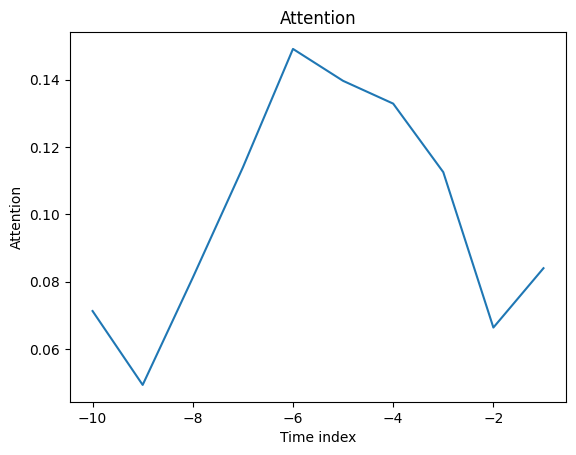

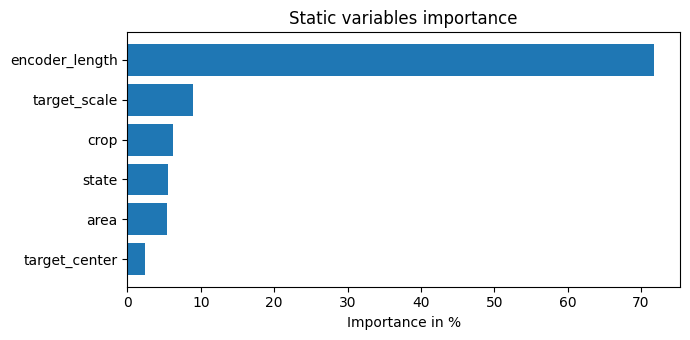

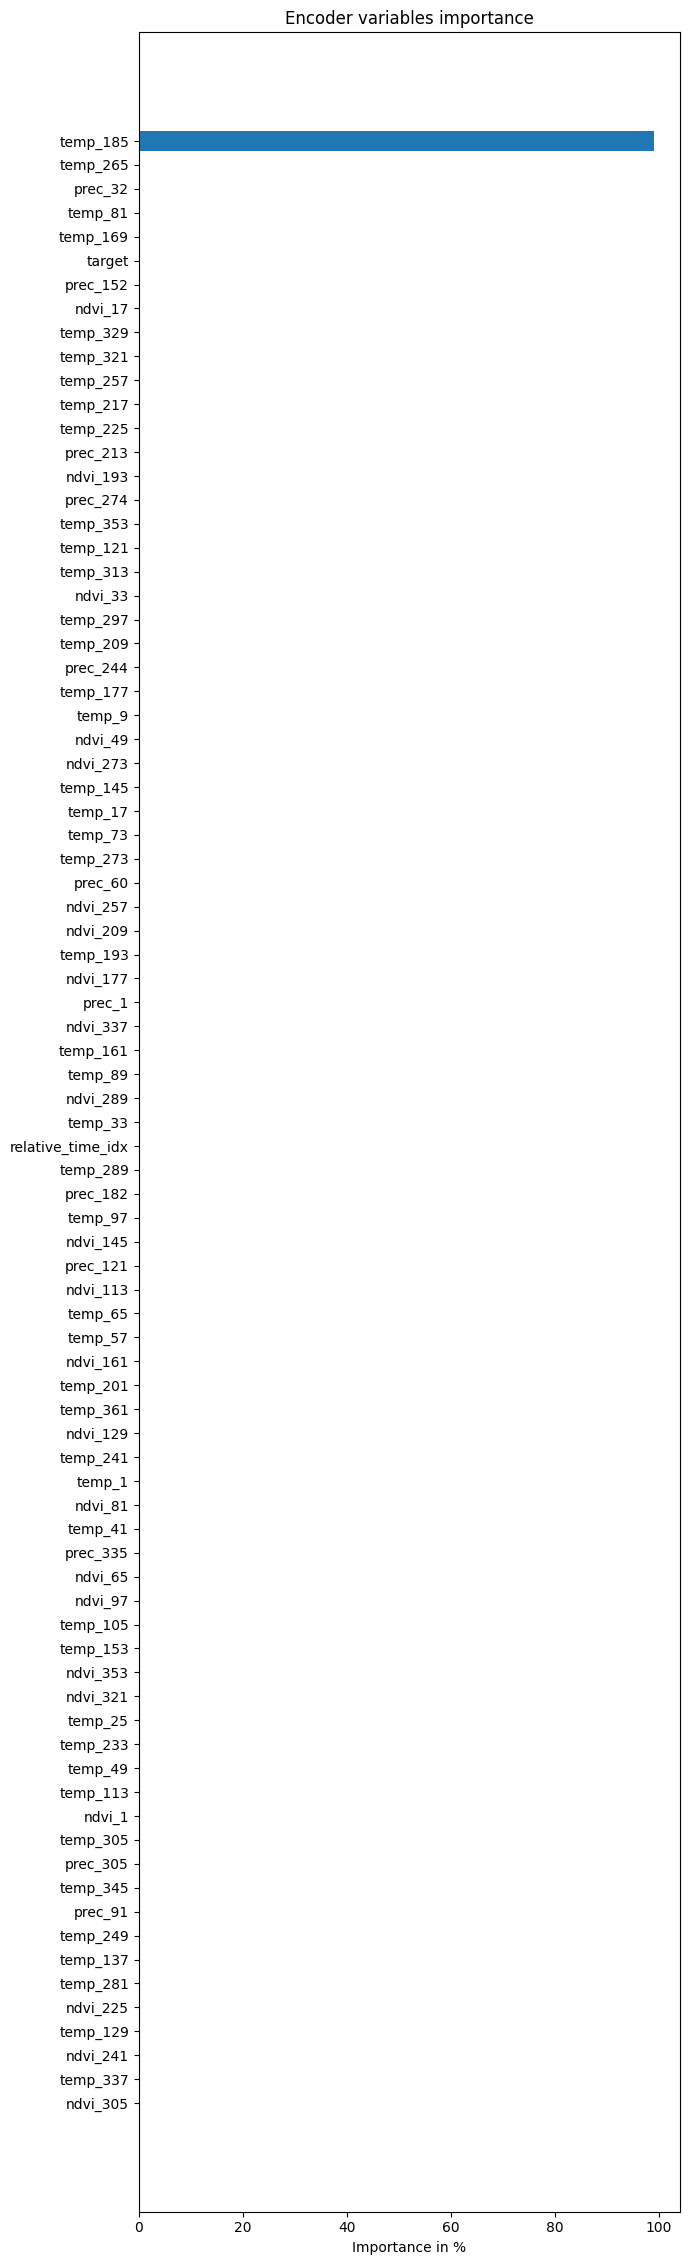

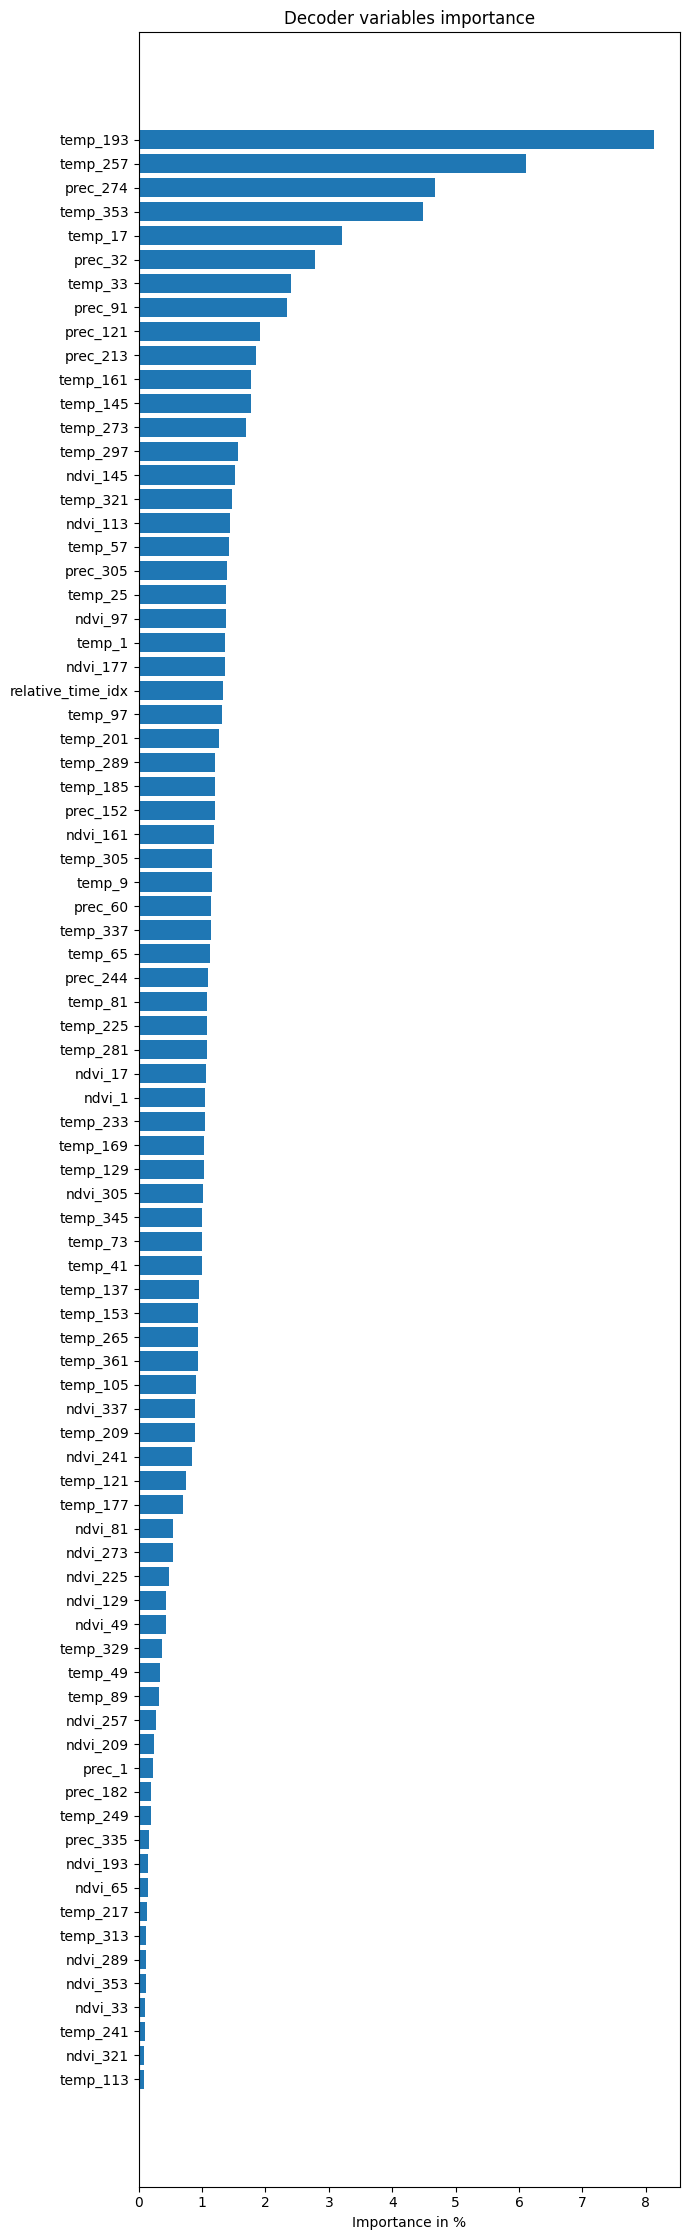

In [ ]:
#print (raw_predictions.output.shape)
interpretation = best_tft.interpret_output(raw_predictions.output, reduction="sum")
best_tft.plot_interpretation(interpretation)

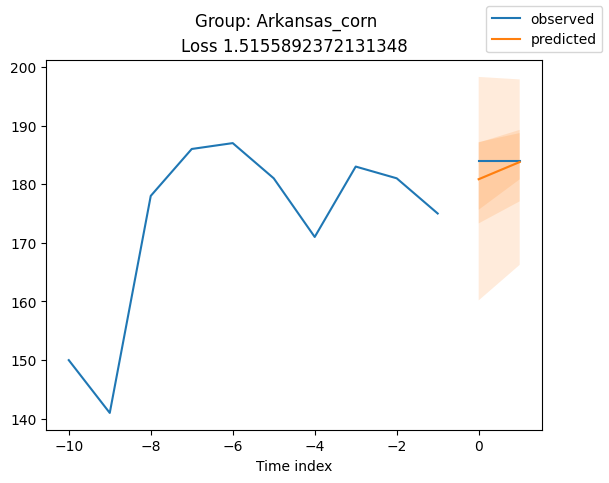

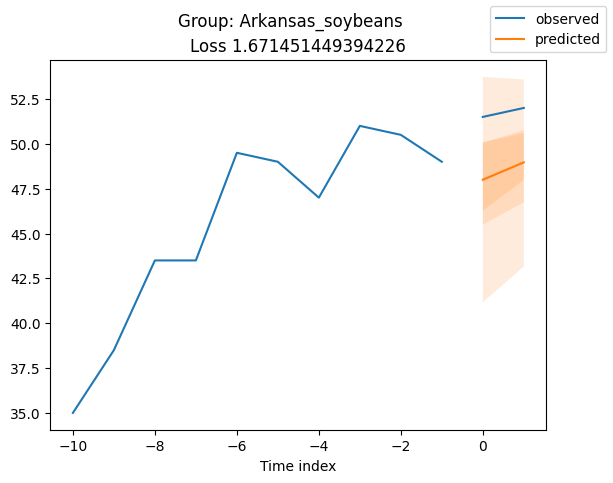

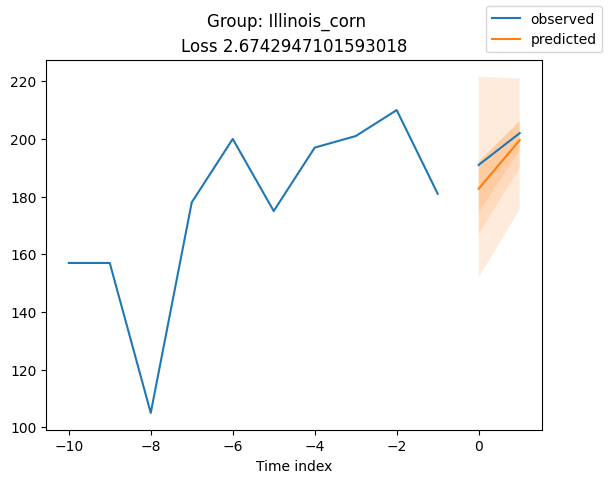

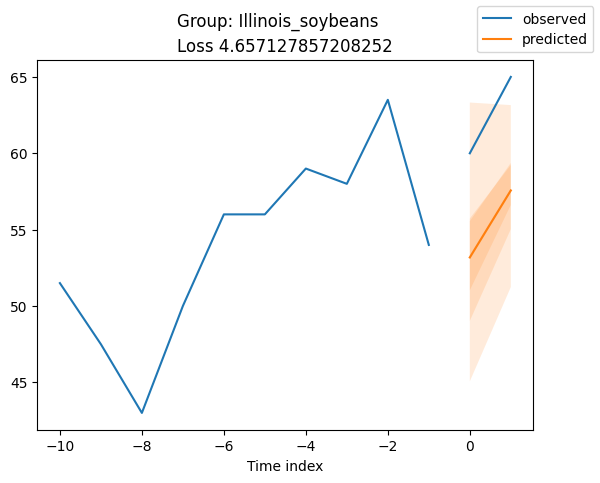

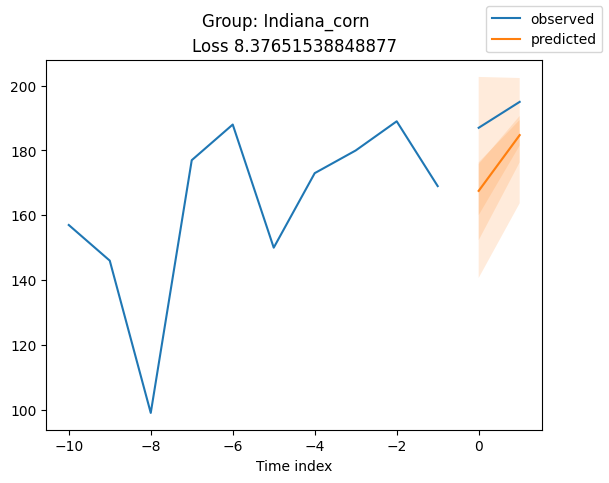

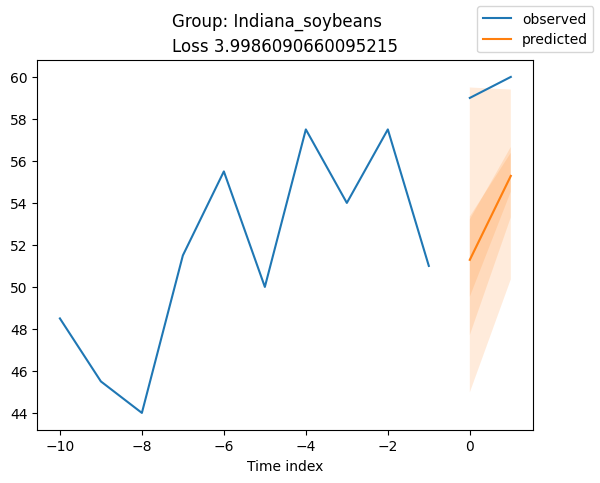

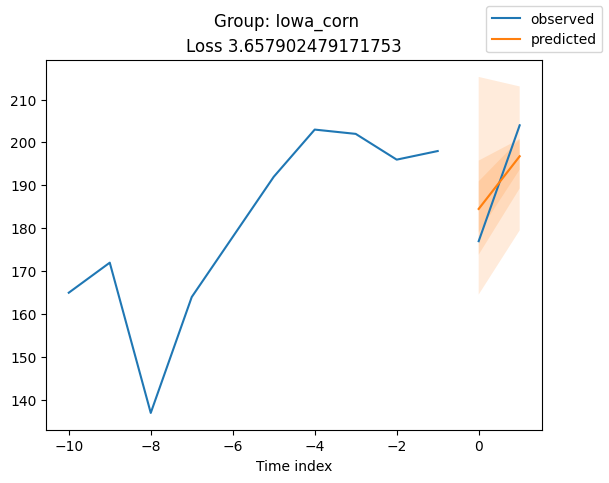

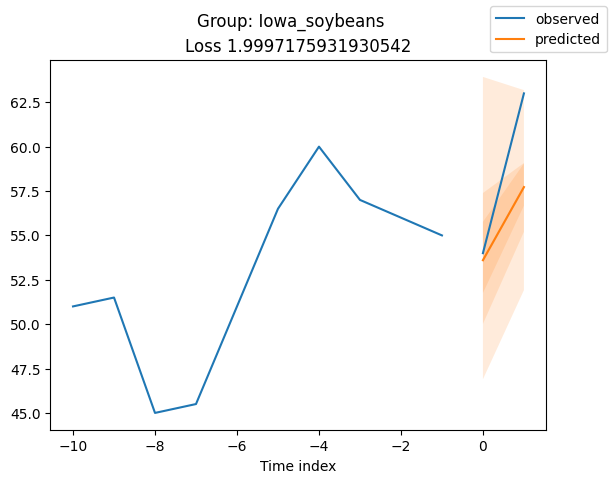

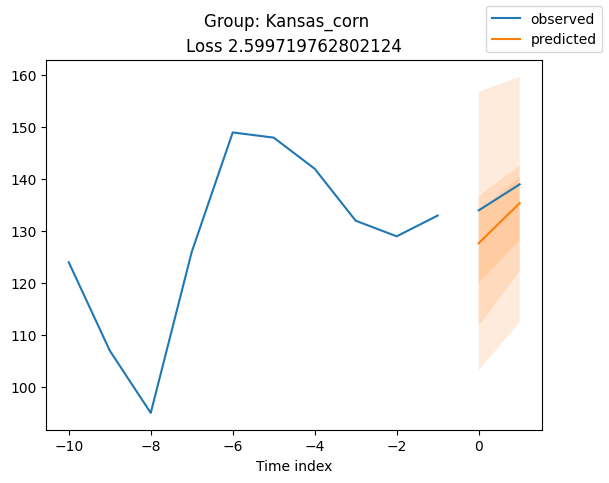

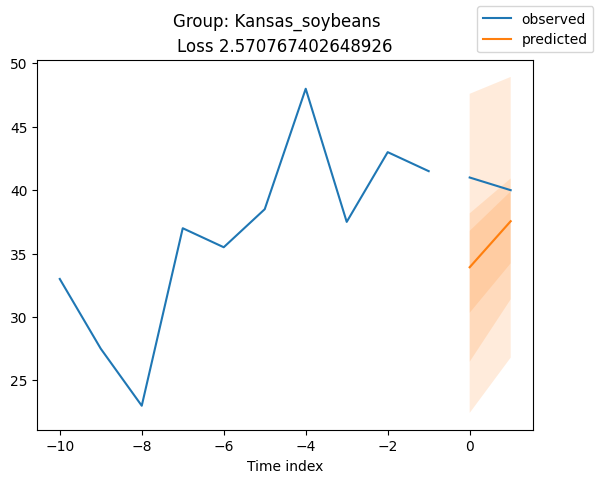

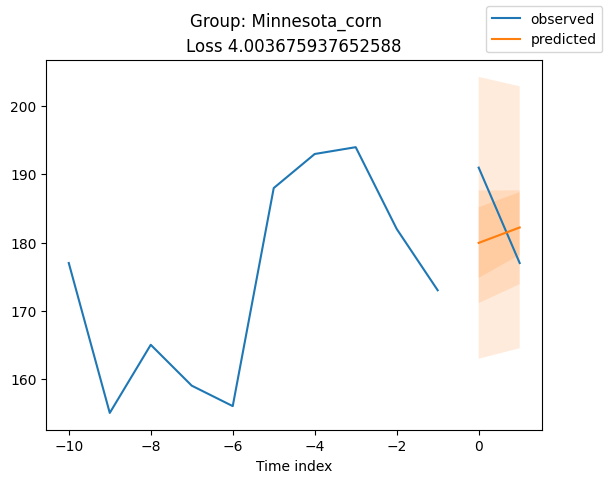

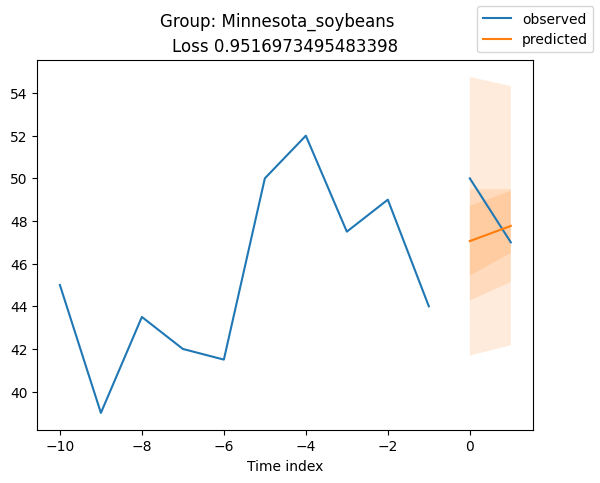

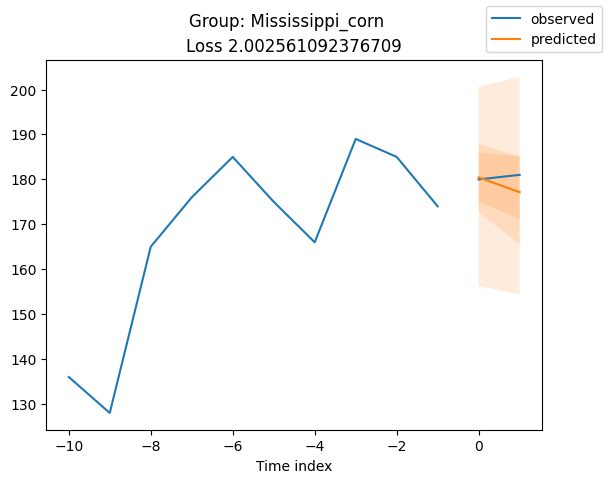

In [ ]:

# best_tft.plot_prediction(raw_predictions.x, raw_predictions.output, add_loss_to_title=True, idx=0)
# print('1')
# best_tft.plot_prediction(raw_predictions.x, raw_predictions.output, add_loss_to_title=True, idx=1)

for idx in range(13):  # plot 10 examples
  plot_ind = best_tft.plot_prediction(raw_predictions.x, raw_predictions.output, idx=idx, add_loss_to_title=True, show_future_observed=True, plot_attention=False)
  idx_name = (raw_predictions.index['group'][idx])
  plot_ind.suptitle(f"Group: {idx_name}")
  # plot_ind.set(title=f"Group: {idx_name}")
  plot_ind.show()

In [ ]:
from pytorch_forecasting.metrics import SMAPE

# calcualte metric by which to display
#predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="cpu"))

#print (predictions.output)

#y_pred = predictions.y[0].cpu()



# ÏòàÏ∏°
predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="cpu"), return_index=True)

# ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í (Îëò Îã§ CPUÎ°ú ÏòÆÍ≤®ÏÑú Í≥ÑÏÇ∞)
y_pred = predictions.output.cpu()
y_true = predictions.y[0].cpu()

# SMAPE Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
smape = SMAPE()

print (y_pred)
print (y_true)
# Ï†ÑÏ≤¥ ÌèâÍ∑† SMAPE Í≥ÑÏÇ∞
smape_score = smape(y_pred, y_true)

print(f"üìä SMAPE (Ï†ÑÏ≤¥ ÌèâÍ∑†): {smape_score * 100:.2f}%")



# mean_losses = SMAPE(reduction="none")(predictions.output, predictions.y).mean(1)
# indices = mean_losses.argsort(descending=True)  # sort losses
# for idx in range(10):  # plot 10 examples
    # best_tft.plot_prediction(
    #     raw_predictions.x,
    #     raw_predictions.output,
    #     idx=indices[idx],
    #     add_loss_to_title=SMAPE(quantiles=best_tft.loss.quantiles),
    # )

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


tensor([[180.8443, 183.7735],
        [ 47.9993,  48.9670],
        [182.7231, 199.5826],
        [ 53.1807,  57.5668],
        [167.5344, 184.7386],
        [ 51.2908,  55.2865],
        [184.5181, 196.7877],
        [ 53.6031,  57.7219],
        [127.6674, 135.3993],
        [ 33.9230,  37.5531],
        [179.9533, 182.2124],
        [ 47.0574,  47.7687],
        [180.4253, 177.1560],
        [ 51.1621,  50.1413],
        [155.2247, 169.0917],
        [ 44.1273,  47.1708],
        [169.0881, 175.4530],
        [ 52.8467,  55.2925],
        [122.3736, 131.5434],
        [ 32.2553,  34.7012],
        [167.0076, 181.5703],
        [ 50.2240,  54.0452],
        [130.9679, 139.0890],
        [ 38.3535,  40.7417],
        [168.6777, 168.0495],
        [ 50.3377,  50.1015]])
tensor([[184.0000, 184.0000],
        [ 51.5000,  52.0000],
        [191.0000, 202.0000],
        [ 60.0000,  65.0000],
        [187.0000, 195.0000],
        [ 59.0000,  60.0000],
        [177.0000, 204.0000],
        [

In [ ]:
predictions = best_tft.predict(val_dataloader, return_x=True)
predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(predictions.x, predictions.output)
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals)